# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [287]:
#Q1.1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_airbnb = pd.read_csv("data/airbnb_NYC.csv", encoding="latin1")   # change path if needed

# 1) turn Price into a string, remove $ and commas, then convert to number
df_airbnb["Price_clean"] = (
    df_airbnb["Price"]
    .astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)  
    .str.strip()
)

df_airbnb["Price_clean"] = pd.to_numeric(df_airbnb["Price_clean"], errors="coerce")

# 2) how many missing after cleaning?
missing_price = df_airbnb["Price_clean"].isna().sum()
print("Missing Price_clean:", missing_price)


'''
I made the price column into text to clean formatting consistently 
then removed symbols that stopped it from being a number (like dollar sign, commas between the thousands, and extra spaces).
Then I converted the cleaned text into a real numeric column and converted any invalid numbers into NaN. 
'''

Missing Price_clean: 0


'\nI made the price column into text to clean formatting consistently \nthen removed symbols that stopped it from being a number (like dollar sign, commas between the thousands, and extra spaces).\nThen I converted the cleaned text into a real numeric column and converted any invalid numbers into NaN. \n'

In [288]:
#Q1.2

df_cop = pd.read_csv("data/mn_police_use_of_force.csv", encoding="latin1")
df_cop["subject_injury"] = df_cop["subject_injury"].replace({"Y": "Yes", "N": "No"})

# proportion missing (before filling)
prop_missing = df_cop["subject_injury"].isna().mean()
print("Proportion missing:", prop_missing)

missing_by_force = df_cop.groupby("force_type")["subject_injury"].apply(lambda s: s.isna().mean())
print("\nMissing proportion by force_type:")
print(missing_by_force.sort_values(ascending=False))

df_cop["subject_injury_clean"] = df_cop["subject_injury"].fillna("Missing")
cross_tab = pd.crosstab(df_cop["force_type"], df_cop["subject_injury_clean"])
print("Crosstab (force_type x subject_injury_clean):")
print(cross_tab)

''' Missingness depends on force_type, for example Bodily Force and Chemical Irritant
have a much higher number of missing subject_injury values. '''


Proportion missing: 0.7619342359767892

Missing proportion by force_type:
force_type
Less Lethal                    1.000000
Maximal Restraint Technique    1.000000
Chemical Irritant              0.892028
Taser                          0.753634
Bodily Force                   0.747720
Baton                          0.500000
Improvised Weapon              0.500000
Police K9 Bite                 0.402597
Gun Point Display              0.259615
Firearm                        0.000000
Less Lethal Projectile         0.000000
Name: subject_injury, dtype: float64
Crosstab (force_type x subject_injury_clean):
subject_injury_clean         Missing    No   Yes
force_type                                      
Baton                              2     0     2
Bodily Force                    7051  1093  1286
Chemical Irritant               1421   131    41
Firearm                            0     2     0
Gun Point Display                 27    33    44
Improvised Weapon                 74    34    40


' Missingness depends on force_type, for example Bodily Force and Chemical Irritant\nhave a much higher number of missing subject_injury values. '

In [289]:
#Q1.3

df_meta = pd.read_csv("data/metabric.csv", encoding="latin1")

df_meta["Overall Survival Status_clean"] = (
    df_meta["Overall Survival Status"].astype(str).str.strip().str.lower()
)

df_meta["Overall Survival Status_binary"] = df_meta["Overall Survival Status_clean"].map({
    "deceased": 0,
    "living": 1
})

print(df_meta["Overall Survival Status"].value_counts().head(20))


Overall Survival Status
1:DECEASED    768
0:LIVING      575
Name: count, dtype: int64


In [290]:
#Q1.4
df_airbnb["Review Scores Rating"] = pd.to_numeric(df_airbnb["Review Scores Rating"], errors="coerce")

# how many missing?
missing_count = df_airbnb["Review Scores Rating"].isna().sum()
print("Missing Review Scores Rating:", missing_count)

med = df_airbnb["Review Scores Rating"].median()
print("Median (non-missing):", med)

# impute median into a NEW column
df_airbnb["Review Scores Rating_imputed"] = df_airbnb["Review Scores Rating"].fillna(med)
print(df_airbnb["Review Scores Rating_imputed"].isna().sum())

'''
Median imputation can bias results because it shrinks variation,
potentially hides real patterns, and can pull relationships towards the middle causing
correlations or regressions to look weaker or misleading.
'''

Missing Review Scores Rating: 8323
Median (non-missing): 94.0
0


'\nMedian imputation can bias results because it shrinks variation,\npotentially hides real patterns, and can pull relationships towards the middle causing\ncorrelations or regressions to look weaker or misleading.\n'

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

Year Minimum:  1000
Year Maximum:  2026
Rows since 1940: 5538
0.9999999999999996


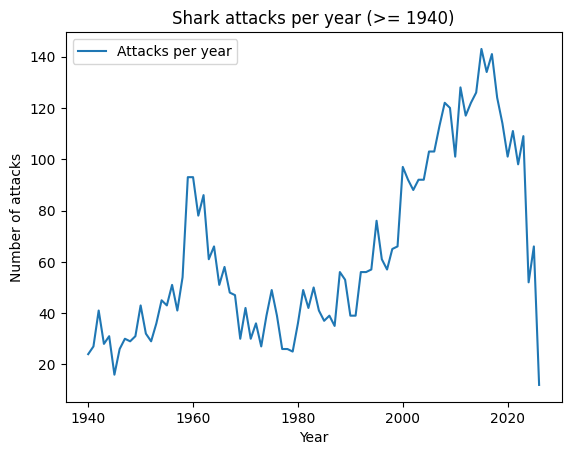

In [291]:
#Q2.1
df_shark = pd.read_excel("data/GSAF5.xls")

#Q2.2
df_shark.columns = df_shark.columns.astype(str).str.strip()
df_shark = df_shark.dropna(axis=1, how="all")
df_shark.head()

#Q2.3
# Observation: Each row represents a singular shark attack, listing information on the time, location, 
# activity, victim demographic, and shark demographic. Knowing this information, when cleaning the data I would not 
# drop NA rows, as it would cause a biased analysis based only on well-documented cases. 

#Q2.4
df_shark["Year_clean"] = pd.to_numeric(
df_shark["Year"].astype(str).str.extract(r"(\d{4})", expand=False),
errors="coerce").astype("Int64")

yr_min = df_shark["Year_clean"].min()
yr_max = df_shark["Year_clean"].max()
print(f"Year Minimum:  {yr_min}")
print(f"Year Maximum:  {yr_max}")

df_1940 = df_shark[df_shark["Year_clean"].notna() & (df_shark["Year_clean"] >= 1940)].copy()
df_1940.head()

print("Rows since 1940:", len(df_1940))
year_counts = df_1940["Year_clean"].value_counts().sort_index()

year_counts = year_counts.reindex(
    range(int(year_counts.index.min()), int(year_counts.index.max()) + 1),
    fill_value=0
)

x = year_counts.index.values.astype(float)
y = year_counts.index.values.astype(float)
slope = np.polyfit(x, y, 1)[0]
print(slope)
plt.figure()
plt.plot(year_counts.index, year_counts.values, label="Attacks per year")


plt.xlabel("Year")
plt.ylabel("Number of attacks")
plt.title("Shark attacks per year (>= 1940)")
plt.legend()
plt.show()

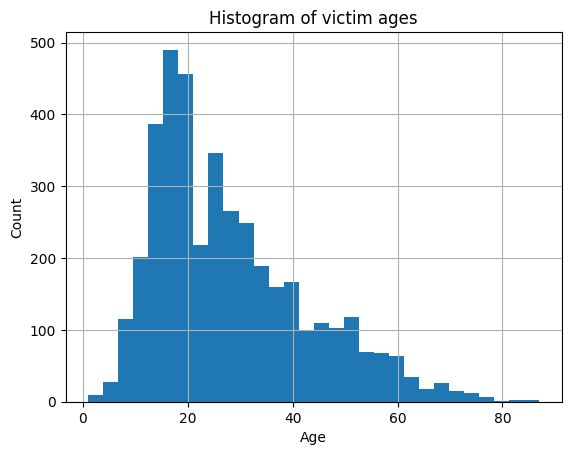

0        13
1         ?
2         ?
3        39
4        11
       ... 
7069    NaN
7070    NaN
7071    NaN
7072    NaN
7073     15
Name: Age, Length: 7074, dtype: object

In [292]:
#2.5

age_raw = df_shark["Age"].replace("?", np.nan)

def age_to_number(x):
    nums = re.findall(r"\d+", str(x))
    if not nums:
        return np.nan
    nums = [float(n) for n in nums]
    return np.mean(nums)

df_shark["Age_clean"] = age_raw.apply(age_to_number)



plt.figure()
df_shark["Age_clean"].dropna().hist(bins=30)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Histogram of victim ages")
plt.show()

df_shark["Age"]

In [293]:
#Q2.6
temp = df_shark["Type"].astype(str).str.strip().str.lower()

df_shark["Type_clean"] = np.select(
    [temp.str.contains("unprovoked", na=False),
     temp.str.contains("provoked", na=False)],
    ["Unprovoked", "Provoked"],
    default="Unknown"
)

known = df_shark["Type_clean"].isin(["Unprovoked", "Provoked"])
prop_unprovoked = (df_shark.loc[known, "Type_clean"] == "Unprovoked").mean()
print("Proportion unprovoked in known attack types:", prop_unprovoked)

prop_unprovoked_overall = (df_shark["Type_clean"] == "Unprovoked").mean()
print("Proportion unprovoked including unknown attack types:", prop_unprovoked_overall)

Proportion unprovoked in known attack types: 0.8902896081771721
Proportion unprovoked including unknown attack types: 0.7387616624257846


In [294]:
df_shark.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22', 'Year_clean',
       'Age_clean', 'Type_clean'],
      dtype='str')

In [322]:
#Q2.7
import numpy as np

f = df_shark['Fatal Y/N'].astype(str).str.strip().str.upper()

df_shark["Fatal_clean"] = np.select(
    [f.str.startswith("Y", na=False),
     f.str.startswith("N", na=False)],
    ["Y", "N"],
    default="Unknown"
)

# quick check
df_shark["Fatal_clean"].value_counts()


Fatal_clean
N          4943
Y          1490
Unknown     641
Name: count, dtype: int64

In [296]:
#Q2.8
sub = df_shark[
    df_shark["Type_clean"].isin(["Provoked", "Unprovoked"]) &
    df_shark["Fatal_clean"].isin(["Y", "N"])
].copy()

sub["Fatal_binary"] = sub["Fatal_clean"].map({"Y": 1, "N": 0})

fatal_rate = sub.groupby("Type_clean")["Fatal_binary"].mean()
print("Fatality rate by Type:")
print(fatal_rate)

print("\nCounts:")
print(pd.crosstab(sub["Type_clean"], sub["Fatal_clean"]))

print("\nRow proportions (within each Type):")
print(pd.crosstab(sub["Type_clean"], sub["Fatal_clean"], normalize="index"))

#Based on the printed fatality rates, unprovoked attacks tend to have more fatalities. 
#This suggests that victims may be more vulnerable when caught by surprise leading to more deaths. It should 
#be noted that this is association and not causation. 

Fatality rate by Type:
Type_clean
Provoked      0.033071
Unprovoked    0.246309
Name: Fatal_binary, dtype: float64

Counts:
Fatal_clean     N     Y
Type_clean             
Provoked      614    21
Unprovoked   3880  1268

Row proportions (within each Type):
Fatal_clean         N         Y
Type_clean                     
Provoked     0.966929  0.033071
Unprovoked   0.753691  0.246309


**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  **1. Read the abstract. What is this paper about**?**
This paper is about the efficiency of the tidy dataset framework in which each variable is a column, each observation is a row, and each type of observational unit is its own table. The paper emphasizes how the structure makes datasets easier to clean with a small set of tools. 

  **2. Read the introduction. What is the "tidy data standard" intended to accomplish?**
The tidy data standard intends to act as a standard structure for organizing data to improve initial cleaning and exploration efficiency. Furthermore, it is intended to be used in order to build and use analysis tools that all work together instead of having to constantly iterate between tools. 

  **3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."**
The first sentence means that since tidy datasets share a baseline structure, they all tend to "look alike". However, messy datasets do not share the same structure making them all unique/messy in their own ways. The second dataset means that within one dataset its generally easy to determine what is a variable vs. what is an observation in the context; it gets tricky to define these two terms generally as they depend on the overall goal and context of the data. 

  **4. Read Section 2.2. How does Wickham define values, variables, and observations?**
Wickham defines values as individual cell entries, variables as the columns (attributes being measured), and observations as the rows (units being described).


  **5. How is "Tidy Data" defined in section 2.3?**
Tidy data is defined as each variable being a column, each observation being a row, and each type of observational unit as a table. 

  **6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?**

The five most common problems are of the following: 
1. Column headers are values and not variable names
2. Multiple variables stored in one column
3. Variables stored in both rows and columns
4. Multiple types of observational units in the same table
5. A single observational unit stored in multiple tables

Table 4 is considered messy because the income brackets are column headers, but they are values of an "income variable". The underlying variables are religion, income, and frequency. 

Melting converts column headers that represent values (like days or categories) into a single “key” column, and puts the cell contents into a single “value” column, while keeping identifier columns the same.


  **7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?**
Table 11 is messy as it stores variables in both the rows and columns. For example, days are stores across multiple columns and the tmin and tmax are stored as row entries under element. 

Table 12 is molten because it turns the day columns into rows under one value column. It keeps the other rows as identifiers. It is tidy because tmin and tmax are unstacked and separate columns making each column a variable, and each row a day's observation. 

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? 

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
6. Which giftors provide the most money, in total? 

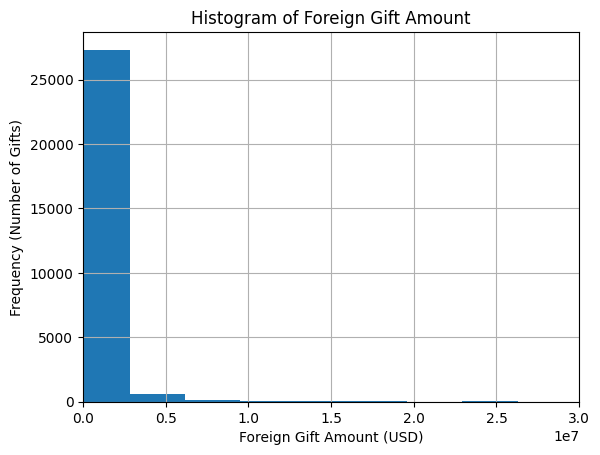

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


In [297]:
#Q4.1
df_gifts = pd.read_csv("data/ForeignGifts_edu.csv")

#Q4.2
df_gifts["Foreign Gift Amount"].dropna().hist(bins=30)

plt.title("Histogram of Foreign Gift Amount")
plt.xlabel("Foreign Gift Amount (USD)")
plt.ylabel("Frequency (Number of Gifts)")

plt.xlim(0, 3e7)
plt.show()


'''Explanation: The histogram is extremely right-skewed. As most gifts are clustered near zero, while only a few numbers
of very large gifts extend towards the right. This means that the mean will be strongly influenced by outliers'''

df_gifts.head()

In [298]:
#Q4.3
df_gifts["Gift Type"] = df_gifts["Gift Type"].astype(str).str.strip()

counts = df_gifts["Gift Type"].value_counts()
props = df_gifts["Gift Type"].value_counts(normalize=True)
print("Counts:")
print(counts)
print("Proportions:")
print(props)



"""Explanation: The Contract gift type makes up approximately 0.6121 of the total gifts, followed by Monetary gift types that make up 0.3875
of gifts. The remaining gift type is Real Estate that makes up a very small percentage of the total gifts, at around 0.0004."""



Counts:
Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64
Proportions:
Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64


'Explanation: The Contract gift type makes up approximately 0.6121 of the total gifts, followed by Monetary gift types that make up 0.3875\nof gifts. The remaining gift type is Real Estate that makes up a very small percentage of the total gifts, at around 0.0004.'

In [299]:

#Q4.4
# Top 15 countries by NUMBER of gifts
top15_count = df_gifts["Country of Giftor"].value_counts().head(15)
print("Top 15 countries by number of gifts:")
print(top15_count)

# Top 15 countries by TOTAL amount given
top15_amount = df_gifts.groupby("Country of Giftor")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15)
print("\nTop 15 countries by total amount given:")
print(top15_amount.head(15))




"""Explanation: The top 15 countries in terms of the number of gifts are England, China, Canada, Japan, Switzerland, Saudi Arabia, France,
Germany, Hong Kong, South Korea, Qatar, Netherlands, Korea, India, and Taiwan. The top 15 countries in terms of the amount given are Qatar, England,
China, Saudi Arabia, Bermuda, Canada, Hong Kong, Japan, Switzerland, India, Germany, United Arab Emirates, France, Singapore, and Australia."""


Top 15 countries by number of gifts:
Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64

Top 15 countries by total amount given:
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA 

'Explanation: The top 15 countries in terms of the number of gifts are England, China, Canada, Japan, Switzerland, Saudi Arabia, France,\nGermany, Hong Kong, South Korea, Qatar, Netherlands, Korea, India, and Taiwan. The top 15 countries in terms of the amount given are Qatar, England,\nChina, Saudi Arabia, Bermuda, Canada, Hong Kong, Japan, Switzerland, India, Germany, United Arab Emirates, France, Singapore, and Australia.'

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


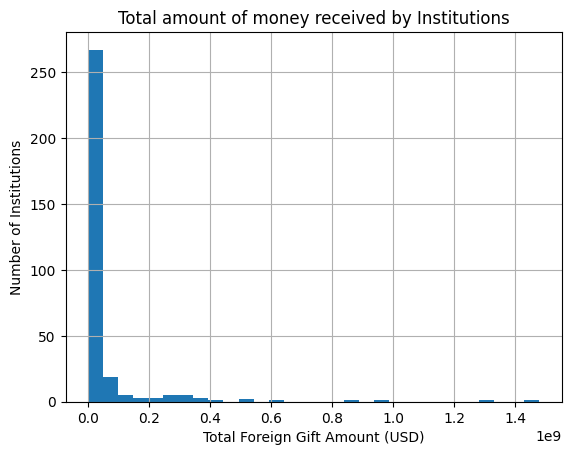

In [300]:
#Q4.5
top_institutions = (df_gifts.groupby("Institution Name")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15))
print(top_institutions)


'''
The top 15 institutions in terms of total foreign gift amount are Carnegie Mellon University,Cornell University, Harvard University, Massachusetts Institute of Technology,
Yale University, Texas A&M University, Johns Hopkins University, Northwestern University, Georgetown University, University of Chicago, University of Colorado Boulder,
Duke University, Brigham Young University, Stanford University,and University of Texas MD Anderson Cancer Center.
'''


institution_totals = (df_gifts.groupby("Institution Name")["Foreign Gift Amount"].sum())
institution_totals.hist(bins=30)


plt.title("Total amount of money received by Institutions")
plt.xlabel("Total Foreign Gift Amount (USD)")
plt.ylabel("Number of Institutions")
plt.show()



In [301]:
#Q4.6
top_giftors = (df_gifts.groupby("Giftor Name")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(10))
print(top_giftors)


'''
The top giftors are of the following: Qatar Foundation (which holds the top 3 spots), the Saudi Arabian 
Cultural Mission, HCL, the Church of Jesus Christ of LDS, the Emirates Institute for Advanced Sc. and QIC.
'''

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Name: Foreign Gift Amount, dtype: int64


'\nThe top giftors are of the following: Qatar Foundation (which holds the top 3 spots), the Saudi Arabian \nCultural Mission, HCL, the Church of Jesus Christ of LDS, the Emirates Institute for Advanced Sc. and QIC.\n'

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [302]:
#Q5.1
df_college = pd.read_csv("data/college_completion.csv")
cols = ["level", "aid_value", "control", "grad_100_value"]
df_college = df_college[cols].copy()



#Q5.2
df_college.head()
print("Observations:", df_college.shape[0])
print("Variables:", df_college.shape[1])

Observations: 3798
Variables: 4


In [303]:
#Q5.3
ct_counts = pd.crosstab(df_college["control"], df_college["level"], dropna=False)
ct_rowprops = pd.crosstab(df_college["control"], df_college["level"], normalize="index", dropna=False)

print("Crosstab counts (control x level):")
print(ct_counts)

print("Row proportions (within each control):")
print(ct_rowprops)

'''Public institutions are mostly 2-year (around 59.4%) while the rest 
are 4-year (40.6%). The private not-for-profit schools are overwhelmingly 4-years (94.6%). 
Private for-profit schools are fairly split, with a slight lean towards 4-year.
'''


Crosstab counts (control x level):
level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632
Row proportions (within each control):
level                     2-year    4-year
control                                   
Private for-profit      0.468750  0.531250
Private not-for-profit  0.054487  0.945513
Public                  0.594352  0.405648


'Public institutions are mostly 2-year (around 59.4%) while the rest \nare 4-year (40.6%). The private not-for-profit schools are overwhelmingly 4-years (94.6%). \nPrivate for-profit schools are fairly split, with a slight lean towards 4-year.\n'


[notice] A new release of pip is available: 24.2 -> 26.0.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


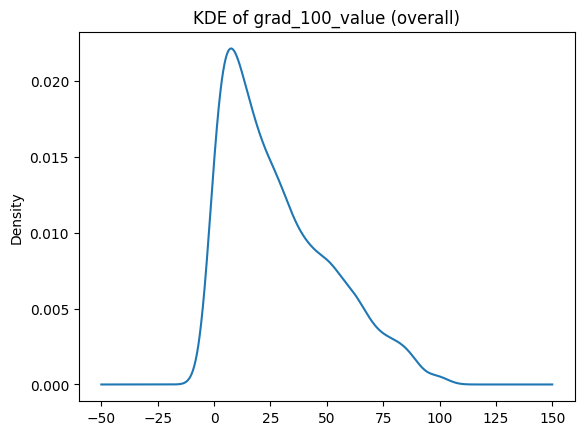

                         count       mean        std  min    25%   50%    75%  \
control                                                                         
Private for-profit       779.0  29.108858  25.601687  0.0   6.95  24.7  46.75   
Private not-for-profit  1189.0  41.660976  23.551231  0.0  25.00  41.0  58.30   
Public                  1499.0  17.430887  14.729443  0.0   6.90  13.2  23.25   

                          max  
control                        
Private for-profit      100.0  
Private not-for-profit  100.0  
Public                   97.8  


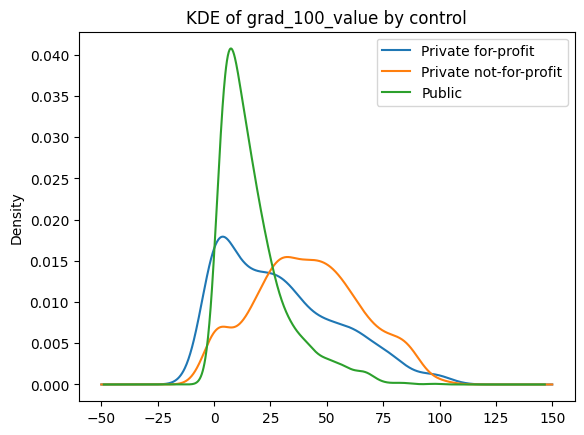

control
Private not-for-profit    41.0
Private for-profit        24.7
Public                    13.2
Name: grad_100_value, dtype: float64


In [313]:
#Q5.4
%pip install scipy


print(df_college["grad_100_value"].describe())
df_college["grad_100_value"].dropna().plot(kind="kde")
plt.title("KDE of grad_100_value (overall)")
plt.show()

# by control
print(df_college.groupby("control")["grad_100_value"].describe())
for ctrl, g in df_college.groupby("control"):
    g["grad_100_value"].dropna().plot(kind="kde", label=ctrl)
plt.title("KDE of grad_100_value by control")
plt.legend()
plt.show()


print(df_college.groupby("control")["grad_100_value"].median().sort_values(ascending=False))


Q5.4
The Private not-for-profit schools come out with the highest median grad_100_value so they appear to have the most favorable graduation rates. 

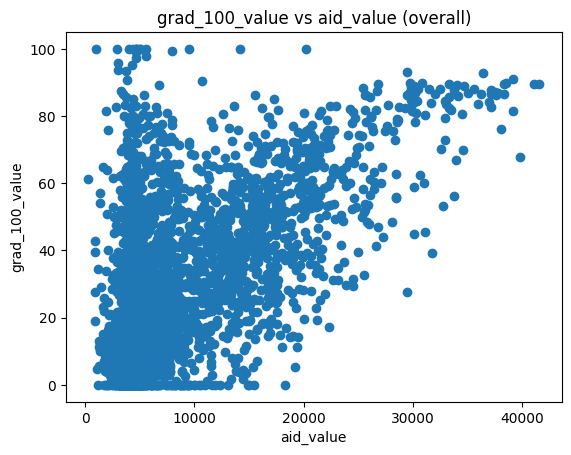

Overall covariance: 88610.4831690244
Overall correlation: 0.5758792845936064


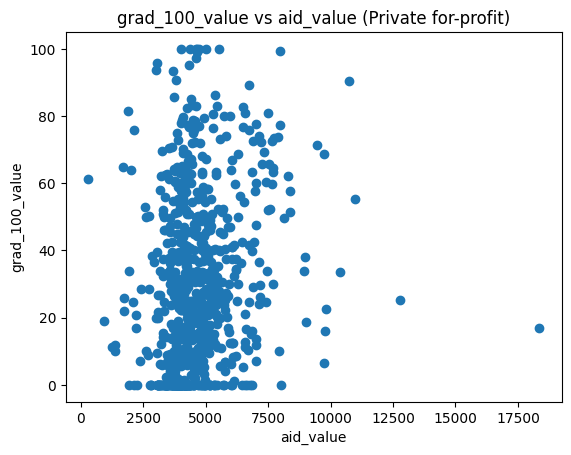

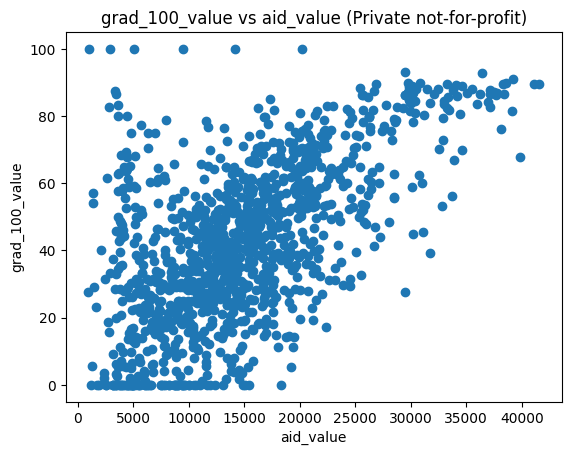

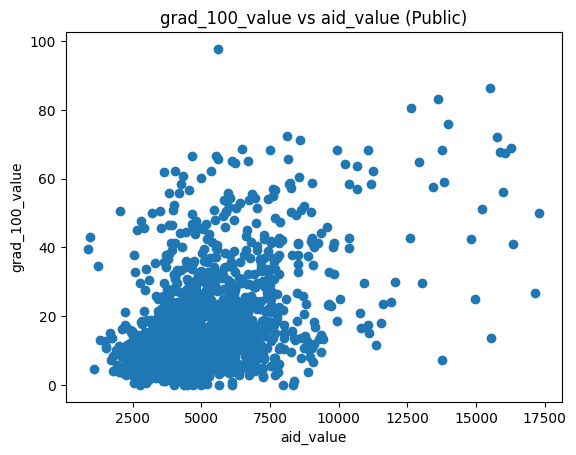

In [306]:
#Q5.5
df_college["aid_value"] = pd.to_numeric(df_college["aid_value"], errors="coerce")

# keep only rows with both numbers
sub = df_college[["aid_value", "grad_100_value", "control"]].dropna().copy()

plt.figure()
plt.scatter(sub["aid_value"], sub["grad_100_value"])
plt.xlabel("aid_value")
plt.ylabel("grad_100_value")
plt.title("grad_100_value vs aid_value (overall)")
plt.show()

cov_overall = sub[["aid_value", "grad_100_value"]].cov().iloc[0, 1]
corr_overall = sub[["aid_value", "grad_100_value"]].corr().iloc[0, 1]
print("Overall covariance:", cov_overall)
print("Overall correlation:", corr_overall)

rows = []
for ctrl, g in sub.groupby("control"):
    plt.figure()
    plt.scatter(g["aid_value"], g["grad_100_value"])
    plt.xlabel("aid_value")
    plt.ylabel("grad_100_value")
    plt.title(f"grad_100_value vs aid_value ({ctrl})")
    plt.show()

    cov = g[["aid_value", "grad_100_value"]].cov().iloc[0, 1]
    corr = g[["aid_value", "grad_100_value"]].corr().iloc[0, 1]
    rows.append([ctrl, len(g), cov, corr])

stats_df = pd.DataFrame(rows, columns=["control", "n", "cov(aid,grad)", "corr(aid,grad)"]) \
            .sort_values("corr(aid,grad)", ascending=False)


Q5.5
Overall, there is an upward trend (as aid_value increases, grad_100_value tends to increase as well). By control, Private not-for-profit institutions tend to have a stronger relationship between higher aid and higher graduation. The relationship is moderately positive for public institutions, and positive but weak for private for-profit schools. 

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$. 

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

# PICTURE ON GITHUB

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

In [307]:
#Q7.1
df_college = pd.read_csv('data/college_completion.csv', encoding="latin1")
df_ames = pd.read_csv("data/ames_prices.csv", encoding="latin1") 
#print(df_ames.columns)
df_ames.columns = df_ames.columns.str.strip()
df_ames = df_ames[["price", "Bldg.Type"]].copy()

df_ames["price"] = pd.to_numeric(df_ames["price"], errors="coerce")

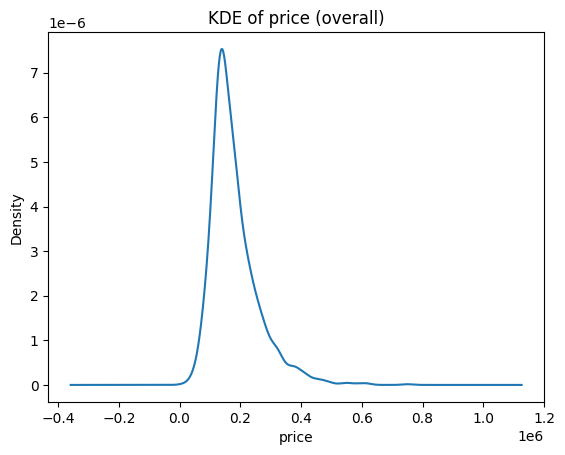

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64


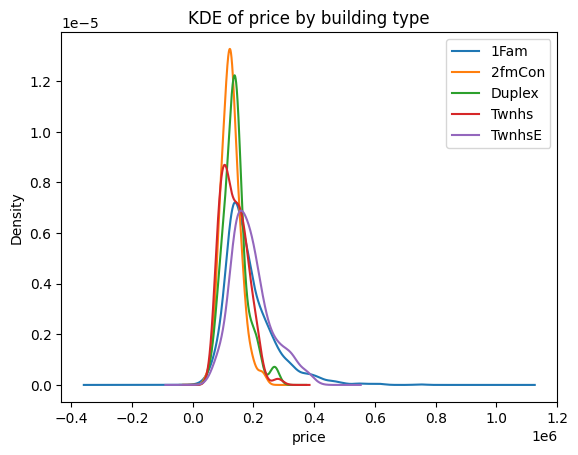

            count           mean           std      min       25%       50%  \
Bldg.Type                                                                     
1Fam       2425.0  184812.041237  82821.802329  12789.0  130000.0  165000.0   
2fmCon       62.0  125581.709677  31089.239840  55000.0  106562.5  122250.0   
Duplex      109.0  139808.935780  39498.973534  61500.0  118858.0  136905.0   
Twnhs       101.0  135934.059406  41938.931130  73000.0  100500.0  130000.0   
TwnhsE      233.0  192311.914163  66191.738021  71000.0  145000.0  180000.0   

                75%       max  
Bldg.Type                      
1Fam       220000.0  755000.0  
2fmCon     140000.0  228950.0  
Duplex     153337.0  269500.0  
Twnhs      170000.0  280750.0  
TwnhsE     222000.0  392500.0  

most expensive on average: Bldg.Type
TwnhsE    192311.914163
1Fam      184812.041237
Duplex    139808.935780
Twnhs     135934.059406
2fmCon    125581.709677
Name: price, dtype: float64

highest variance:  Bldg.Type
1Fam  

In [308]:
#Q7.2
df_ames["price"] = pd.to_numeric(df_ames["price"], errors="coerce")

plt.figure()
df_ames["price"].dropna().plot(kind="kde")
plt.xlabel("price")
plt.title("KDE of price (overall)")
plt.show()

print(df_ames["price"].describe())

#Building type
plt.figure()
for t, g in df_ames.groupby("Bldg.Type"):
    g["price"].dropna().plot(kind="kde", label=t)

plt.xlabel("price")
plt.title("KDE of price by building type")
plt.legend()
plt.show()

desc_by_type = df_ames.groupby("Bldg.Type")["price"].describe()
print(desc_by_type)

print("\nmost expensive on average:", df_ames.groupby("Bldg.Type")["price"].mean().sort_values(ascending=False))
print("\nhighest variance: ", df_ames.groupby("Bldg.Type")["price"].var().sort_values(ascending=False))

#Townhouse (End Units) are the most expensive on average, and non-end units Townhouses have the highest variance.  

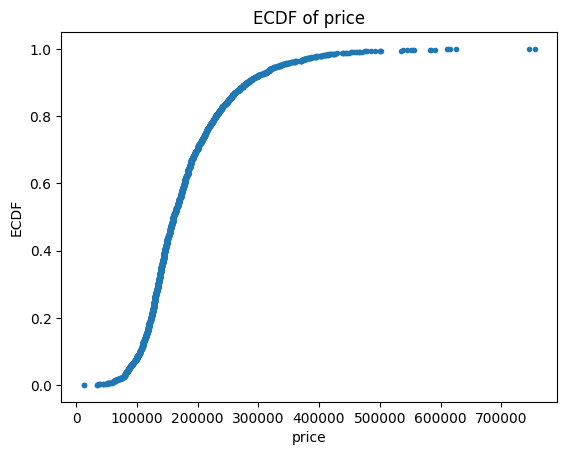

min        12789.0
q1        129500.0
median    160000.0
q3        213500.0
max       755000.0
Name: price, dtype: float64


In [309]:
#Q7.3
x = np.sort(df_ames["price"].dropna().values)
y = np.arange(1, len(x) + 1) / len(x)

plt.figure()
plt.plot(x, y, marker=".", linestyle="none")
plt.xlabel("price")
plt.ylabel("ECDF")
plt.title("ECDF of price")
plt.show()

# 5-number summary
five_num = df_ames["price"].quantile([0, 0.25, 0.5, 0.75, 1.0])
five_num.index = ["min", "q1", "median", "q3", "max"]
print(five_num)

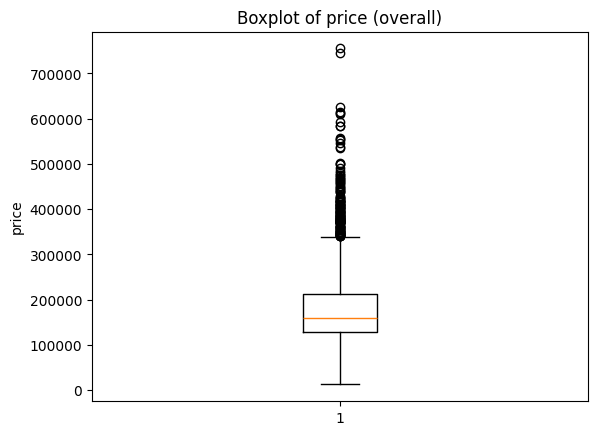

<Figure size 1000x400 with 0 Axes>

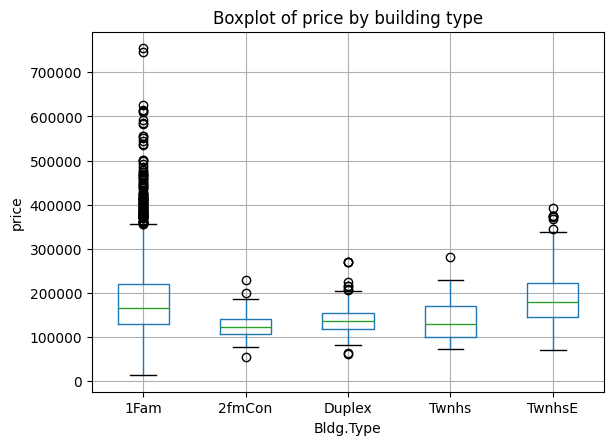

'\nYes, there are high-price outliers, and the typical price and variability differ by \nbuilding type—TwnhsE is highest on average, while Twnhs varies the most\n'

In [310]:
plt.figure()
plt.boxplot(df_ames["price"].dropna())
plt.ylabel("price")
plt.title("Boxplot of price (overall)")
plt.show()

plt.figure(figsize=(10,4))
df_ames.boxplot(column="price", by="Bldg.Type")
plt.suptitle("")
plt.title("Boxplot of price by building type")
plt.xlabel("Bldg.Type")
plt.ylabel("price")
plt.show()

'''
Yes, there are high-price outliers, and the typical price and variability differ by 
building type—TwnhsE is highest on average, while Twnhs varies the most
'''

In [311]:
#Q7.5
Q1 = df_ames["price"].quantile(0.25)
Q3 = df_ames["price"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_ames["outlier"] = (df_ames["price"] < lower) | (df_ames["price"] > upper)

print("Outlier count:", df_ames["outlier"].sum())
print("Outlier proportion:", df_ames["outlier"].mean())



Outlier count: 137
Outlier proportion: 0.04675767918088737


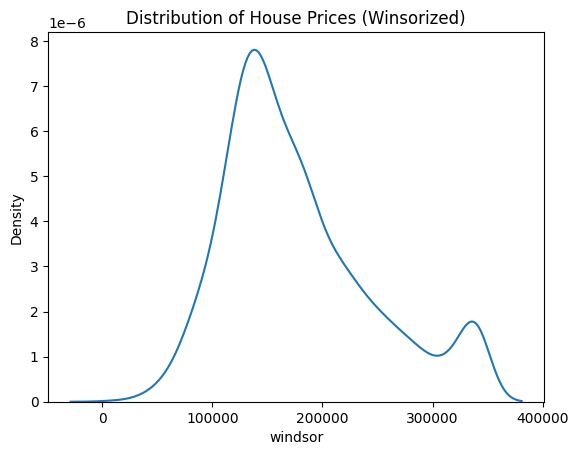

count      2930.000000
mean     177082.283959
std       67906.837135
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      339500.000000
Name: windsor, dtype: float64


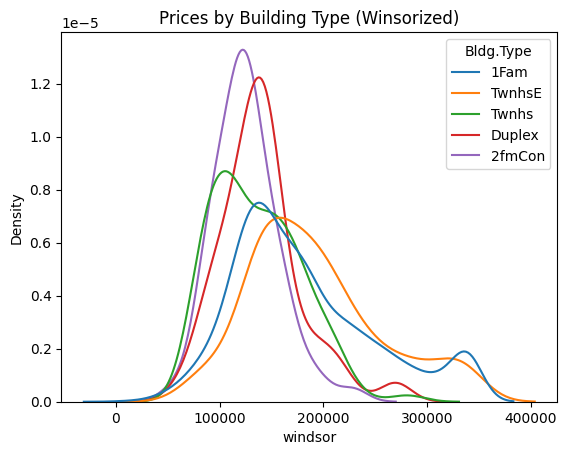

,count,mean,std,min,25%,50%,75%,max
Bldg.Type,,,,,,,,
1Fam,2425.0,180417.359588,69177.514863,12789.0,130000.0,165000.0,220000.0,339500.0
2fmCon,62.0,125581.709677,31089.239840,55000.0,106562.5,122250.0,140000.0,228950.0
Duplex,109.0,139808.935780,39498.973534,61500.0,118858.0,136905.0,153337.0,269500.0
Twnhs,101.0,135934.059406,41938.931130,73000.0,100500.0,130000.0,170000.0,280750.0
TwnhsE,233.0,191349.420601,63715.987930,71000.0,145000.0,180000.0,222000.0,339500.0


'\nThe maximum price decreases, as we windsorized it to cap out at the upper bound and very high outliers\nget capped at the 99th percentile. The standard deviation decreases because the extreme values are no longer pulling\nthe spread out. The median generally stays about the same as winsorizing mostly affects the extremes.  \n'

In [312]:
#Q7.6
df_ames['windsor'] = df_ames['price']

# 2. Replace outliers with the boundary values
df_ames.loc[df_ames['price'] > upper, 'windsor'] = upper
df_ames.loc[df_ames['price'] < lower, 'windsor'] = lower

sns.kdeplot(df_ames['windsor'])
plt.title('Distribution of House Prices (Winsorized)')
plt.show()
print(df_ames['windsor'].describe())

sns.kdeplot(data=df_ames, x='windsor', hue='Bldg.Type', common_norm=False)
plt.title('Prices by Building Type (Winsorized)')
plt.show()

summary_by_type = df_ames.groupby('Bldg.Type')['windsor'].describe()
display(summary_by_type)

'''
The maximum price decreases, as we windsorized it to cap out at the upper bound and very high outliers
get capped at the 99th percentile. The standard deviation decreases because the extreme values are no longer pulling
the spread out. The median generally stays about the same as winsorizing mostly affects the extremes.  
'''